📊 Grid Search Results:
Best Params: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE: 39358.27834235224
R²: 0.5289977477477479


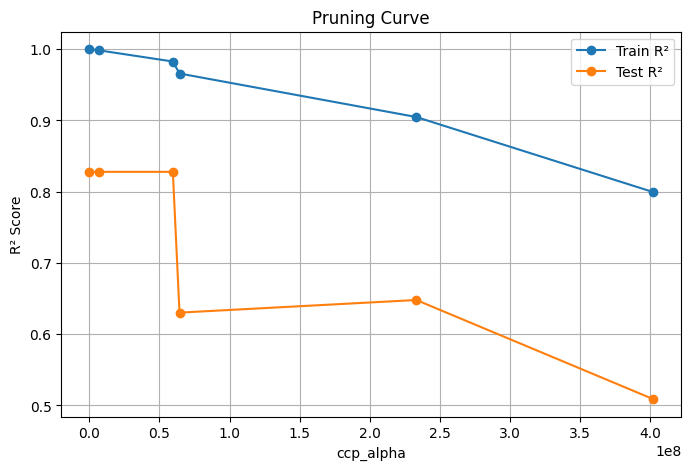

🌳 Pruned Tree Results:
Best alpha: 0.0
RMSE: 23804.761428476166
R²: 0.8277027027027026

📘 Final Tree Rules:

|--- Rooms <= 3.50
|   |--- Location_Score <= 7.50
|   |   |--- value: [100000.00]
|   |--- Location_Score >  7.50
|   |   |--- Size <= 80.00
|   |   |   |--- value: [130000.00]
|   |   |--- Size >  80.00
|   |   |   |--- Size <= 95.00
|   |   |   |   |--- value: [150000.00]
|   |   |   |--- Size >  95.00
|   |   |   |   |--- value: [160000.00]
|--- Rooms >  3.50
|   |--- Rooms <= 5.50
|   |   |--- Rooms <= 4.50
|   |   |   |--- value: [210000.00]
|   |   |--- Rooms >  4.50
|   |   |   |--- value: [240000.00]
|   |--- Rooms >  5.50
|   |   |--- value: [290000.00]



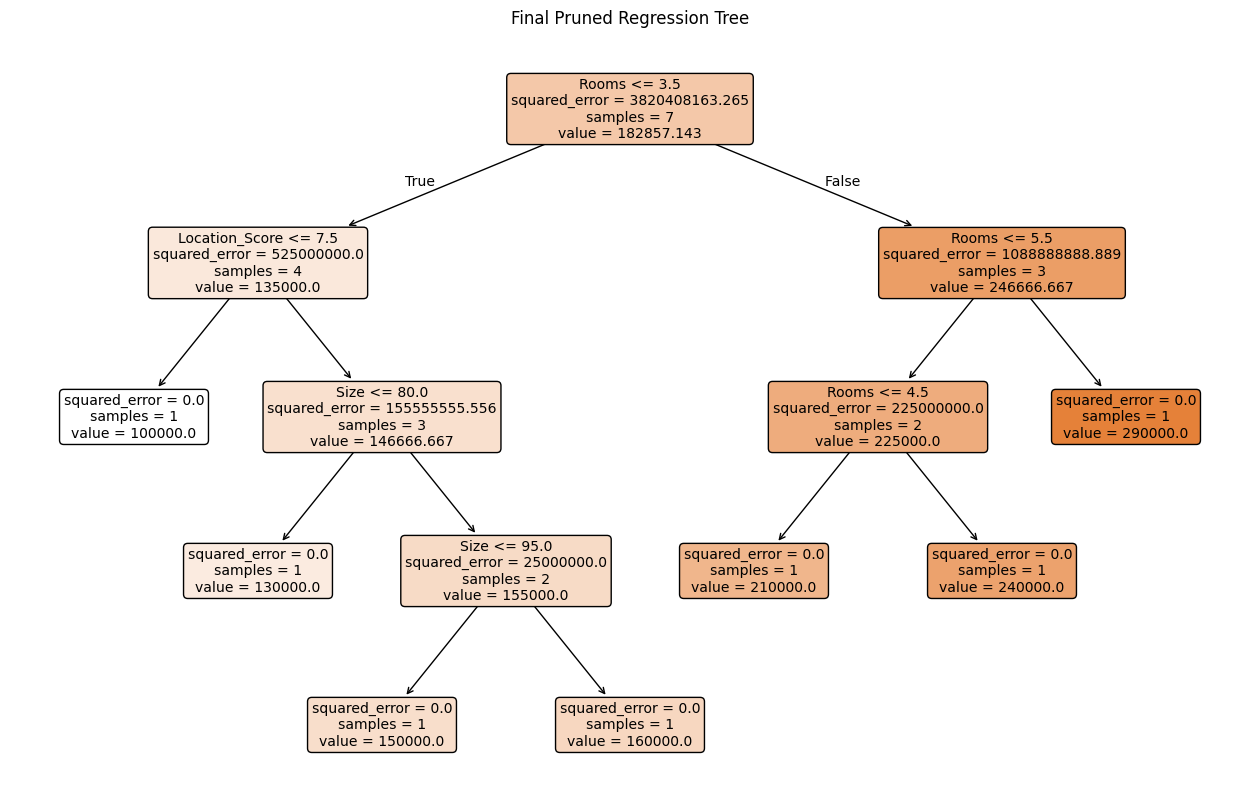

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create dataset
data = {
    'Size': [50, 60, 70, 90, 100, 120, 150, 180, 200, 220],
    'Rooms': [2, 2, 3, 3, 3, 4, 4, 5, 5, 6],
    'Location_Score': [7, 6, 8, 9, 8, 9, 7, 6, 10, 10],
    'Price': [100000, 120000, 130000, 150000, 160000, 180000, 210000, 240000, 260000, 290000]
}
df = pd.DataFrame(data)

# 2. Train/test split
X = df[['Size', 'Rooms', 'Location_Score']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Grid Search for best hyperparameters
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 4. Train best model from GridSearch
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("📊 Grid Search Results:")
print("Best Params:", grid_search.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_grid)))
print("R²:", r2_score(y_test, y_pred_grid))

# 5. Post-pruning using cost-complexity pruning path
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # drop last (overpruned tree)
trees = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    trees.append(pruned_tree)

train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

# 6. Plot pruning curve
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train R²")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test R²")
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.title("Pruning Curve")
plt.legend()
plt.grid(True)
plt.show()

# 7. Choose best pruned tree
best_alpha = ccp_alphas[np.argmax(test_scores)]
final_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)
y_pred_pruned = final_model.predict(X_test)

print("🌳 Pruned Tree Results:")
print("Best alpha:", best_alpha)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pruned)))
print("R²:", r2_score(y_test, y_pred_pruned))

# 8. Show tree structure
print("\n📘 Final Tree Rules:\n")
print(export_text(final_model, feature_names=list(X.columns)))

# 9. Visualize final tree
plt.figure(figsize=(16, 10))
plot_tree(final_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Final Pruned Regression Tree")
plt.show()



Ingrese 3 datosedf
[('e', 0), ('d', 1), ('f', 2)]
